In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [24]:
# after downgrading numpy version because of unnecessary FutureWarnigns while using some numpy arrays
np.__version__

'1.14.6'

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


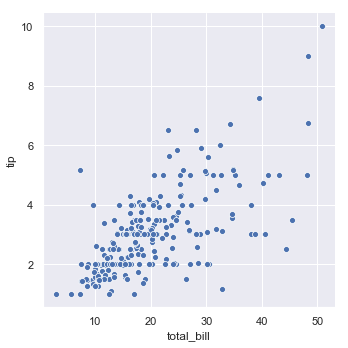

In [25]:
# 'sns.relplot' as an example of figure-level function combined with axes-level function 'scatterplot'(default)
# another option is line plot - there will be parameter kind='line'
tips = sns.load_dataset('tips')
tips.head()
sns.relplot(x='total_bill', y='tip', data=tips)

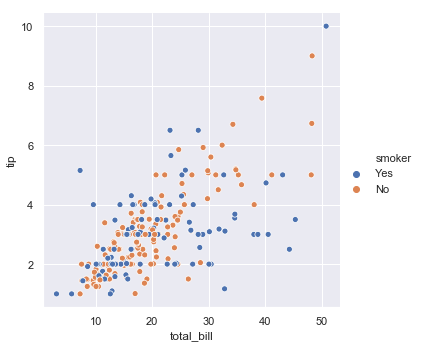

In [26]:
# to variables 'total_bill' and 'tip' now is added third var 'smoker' with default name 'hue'
# Seaborn has 3 kind of semanthics(param) for additional variables: 'hue', 'style', 'size'
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips);

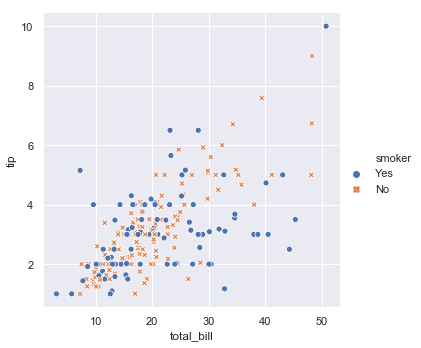

In [27]:
# to emphasize difference between classes of 'smoker' we can add different marker style(style='smoker')
sns.relplot(x='total_bill', y='tip', hue='smoker', style='smoker', data=tips);

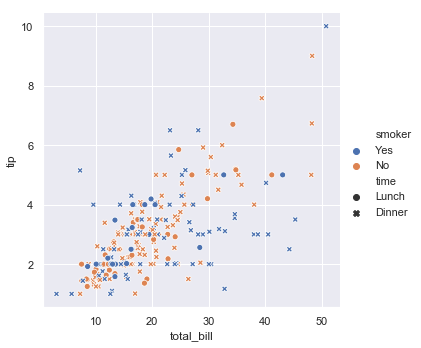

In [28]:
# adding 4th variable is also possible - we can give for 'style' another one
sns.relplot(x='total_bill', y='tip', hue='smoker', style='time', data=tips);

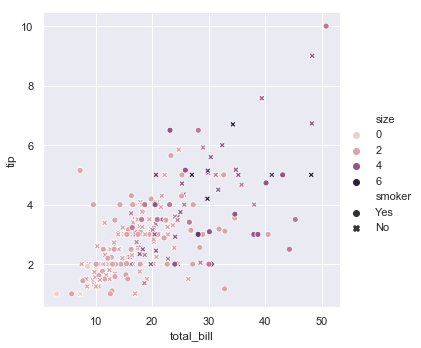

In [29]:
# hue parameter returns different colors for given variable when it is categorical type('yes', 'no') - qualitative palette
# for numeric variables like size(2,3,4) coloring switches to sequential palette
sns.relplot(x='total_bill', y='tip', hue='size', style='smoker', data=tips);

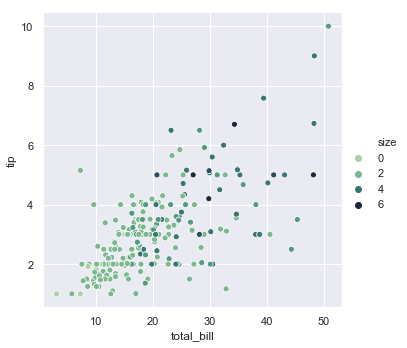

In [30]:
# customizing the color palette
sns.relplot(x='total_bill', y='tip', hue='size', palette='ch:r=-.5,l=.75', data=tips);

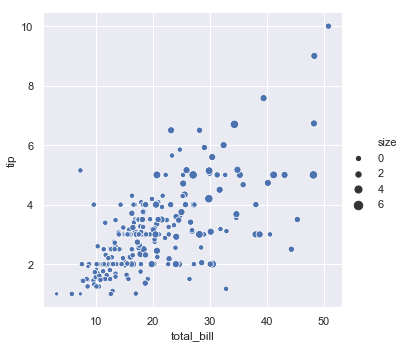

In [31]:
# using 'size' semanthic to change size of dots - it is given to variable the same name 'size'(partysize-number of people)
sns.relplot(x='total_bill', y='tip', size='size', data=tips);

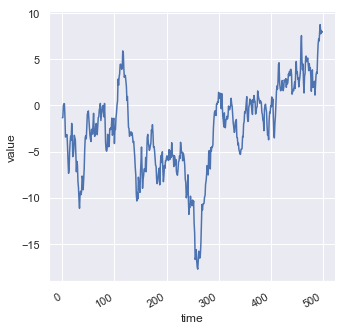

In [32]:
# Emphasizing continuity with line plots - like above but with parameter kind='line'(not scatter plots)
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.fig.autofmt_xdate() # makes rotation and horizontal alingment of xticklabels

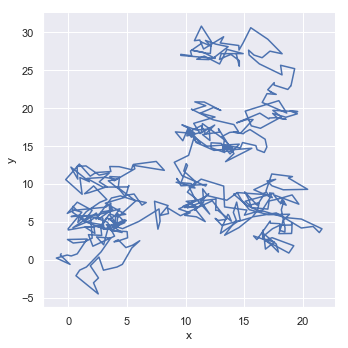

In [33]:
# after disabling default behavior of sorting the data
# by the x values before plotting(like above)
df = pd.DataFrame(np.random.randn(500,2).cumsum(axis=0),columns=['x','y'])
sns.relplot(x='x', y='y', sort=False, kind='line', data=df);

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


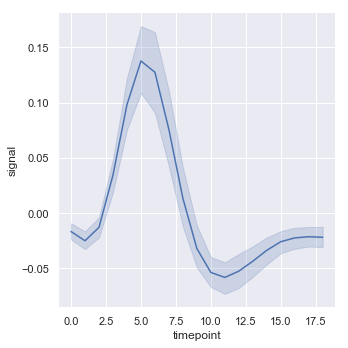

In [34]:
# Aggregation and representing uncertainty
# when multiple measurements for the same value of x
# variable seaborn is plotting mean value for them and 95%
# confidence interval around the mean)
fmri = sns.load_dataset('fmri')
fmri.head()
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

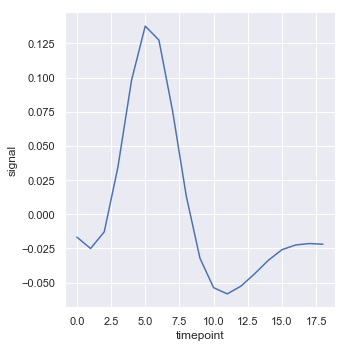

In [35]:
# because of time consuming process of counting confidence
# intervals for larger datasets it is possible to disable them
sns.relplot(x='timepoint', y='signal', ci=None, kind='line', data=fmri);

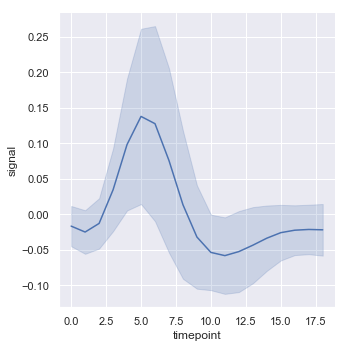

In [36]:
# another option is plotting the standard deviation at each timepoint
# instead of a confidence interval
sns.relplot(x='timepoint', y='signal', kind='line',
           ci='sd', data=fmri);

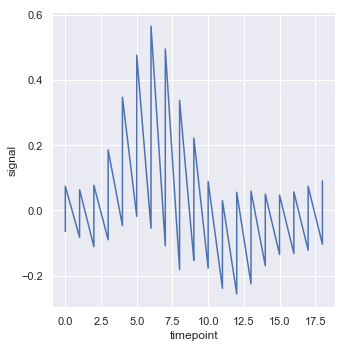

In [37]:
# after turning off aggregation (estimator) the plot
# has multiple values at some timepoints
sns.relplot(x='timepoint', y='signal',
           estimator=None, kind='line', data=fmri);

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


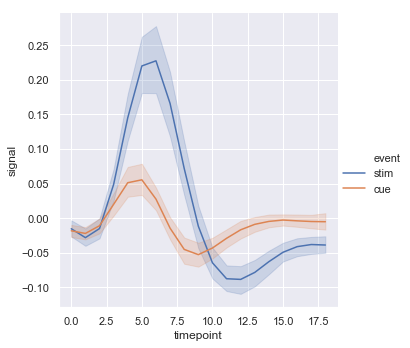

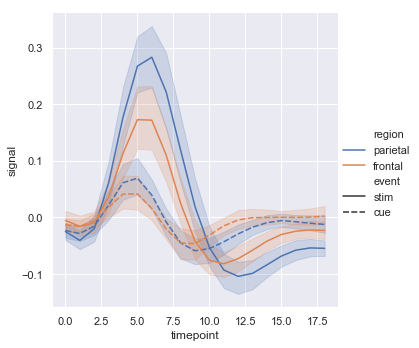

In [61]:
# Plotting subsets of data with semantic mappings
# hue means colors, style means line shape, size means size of lines, dots,etc
fmri.head()
sns.relplot(x='timepoint', y='signal', hue='event',
           kind='line', data=fmri)
sns.relplot(x='timepoint', y='signal', hue='region',
           style='event', kind='line', data=fmri)

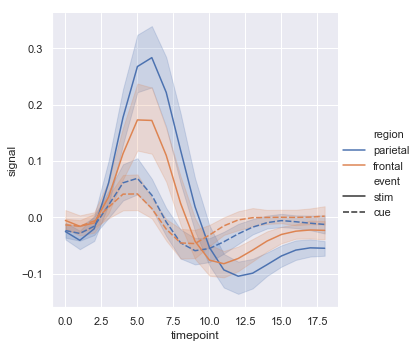

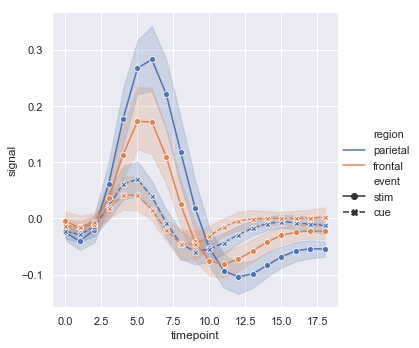

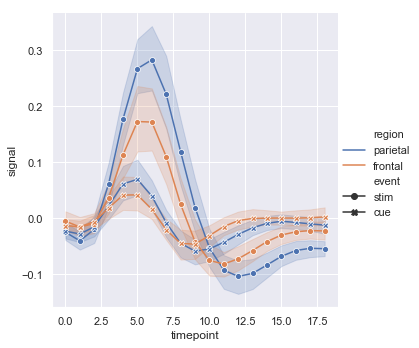

In [63]:
# instead of simple lines plot can be used with markers(x-x-x)/(big dots)
sns.relplot(x='timepoint', y='signal', hue='region', style='event',
            dashes=True, markers=False, kind='line', data=fmri)
sns.relplot(x='timepoint', y='signal', hue='region', style='event',
            dashes=True, markers=True, kind='line', data=fmri)
sns.relplot(x='timepoint', y='signal', hue='region', style='event',
           dashes=False, markers=True, kind='line', data=fmri)

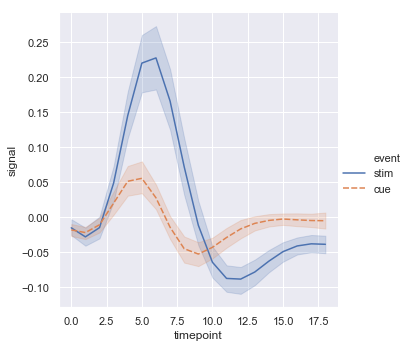

In [66]:
# try not to overuse the semantics - difficult to interpret
# for black printing better to alter both the color and style
sns.relplot(x='timepoint', y='signal',hue='event',
            style='event', kind='line', data=fmri);

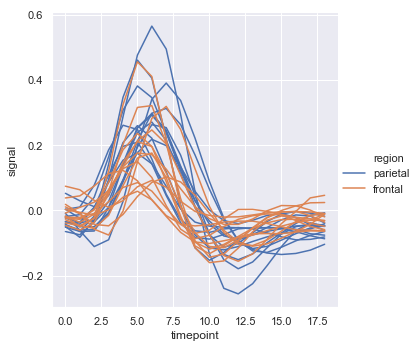

In [76]:
# while working with repeated data also possible
# plotting for each unit('subject') separately without approximating
sns.relplot(x='timepoint', y='signal', hue='region',
            units='subject', estimator=None, kind='line',
          data=fmri.query("event=='stim'"));

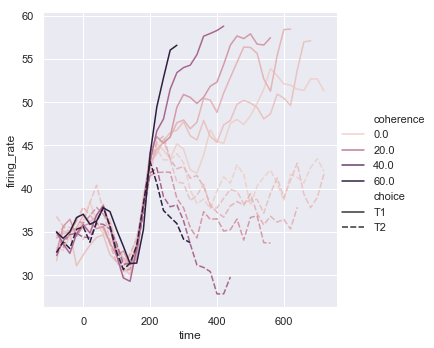

In [78]:
# default colormap and the legend depends on whether the hue
# semantic is categorical or numeric
dots = sns.load_dataset('dots').query("align=='dots'")
sns.relplot(x='time', y='firing_rate', hue='coherence',
           style='choice', kind='line', data=dots);

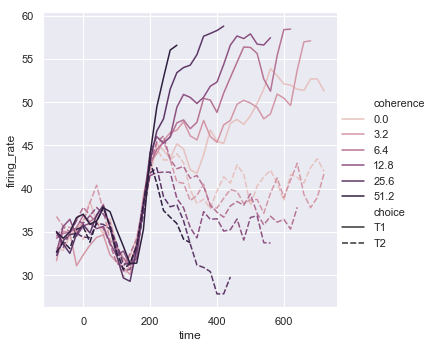

In [84]:
# instead of palette scale logarithm type better visualisation
# may give specific color values for each line (passing list or directory)
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x='time', y='firing_rate', hue='coherence',
           style='choice', palette=palette, kind='line', data=dots);

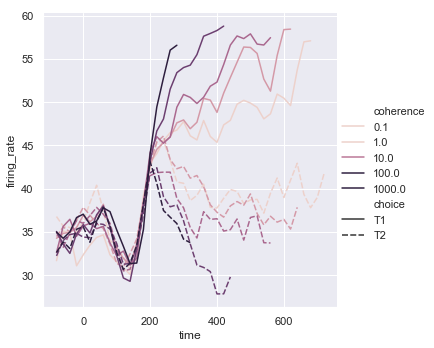

In [85]:
# the same but with colormap normalized(logarithmic)
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x='time', y='firing_rate', hue='coherence',
           style='choice', hue_norm=LogNorm(), kind='line', data=dots);

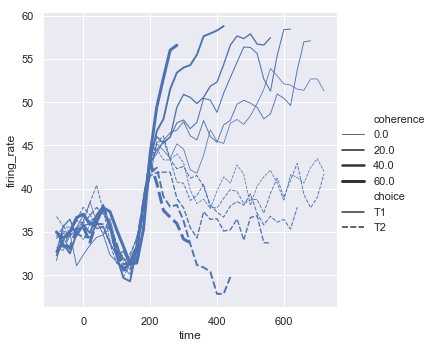

In [86]:
# the third semantic, size, changes the width of the line
sns.relplot(x='time', y='firing_rate', size='coherence',
           style='choice', kind='line', data=dots);

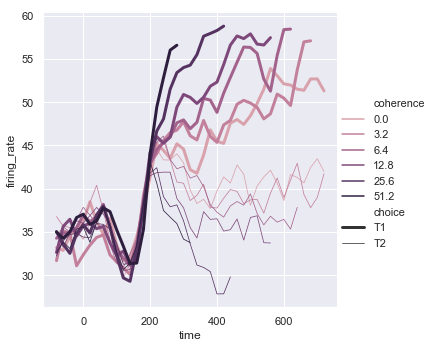

In [87]:
# using size semanthic with categorical variable(sometimes useful)
sns.relplot(x='time', y='firing_rate', hue='coherence',
           size='choice', palette=palette, kind='line', data=dots);

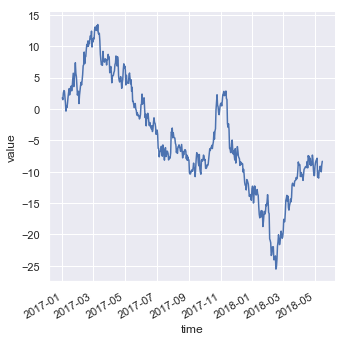

In [90]:
# Plotting with date data - original format od data due to
# underlying matplotlib functions
df = pd.DataFrame(dict(time=pd.date_range('2017-1-1', periods=500),
                 value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.fig.autofmt_xdate(); # rotates and aligns xticklabels


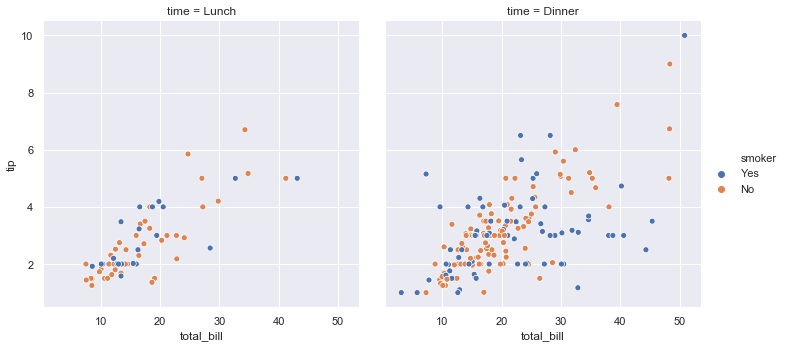

In [91]:
# Showing multiple relationships with facets
# instead of using semantic roles in one plot it is possible
# to plot separate plots to compare influence of different
# variables on a relationship between two examined vars
sns.relplot(x='total_bill', y='tip', hue='smoker',
           col='time', data=tips);

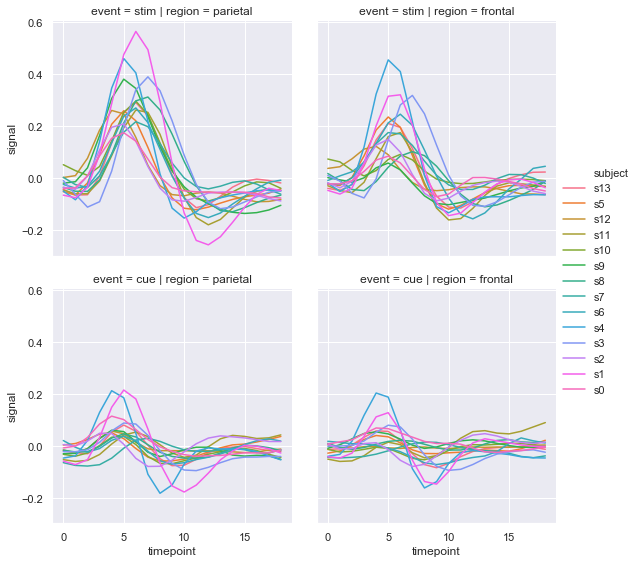

In [100]:
# showing additional plots is possible due to row argument
sns.relplot(x='timepoint', y='signal', hue='subject',
           col='region', row='event', height=4, aspect=1,
           kind='line', estimator=None, data=fmri);

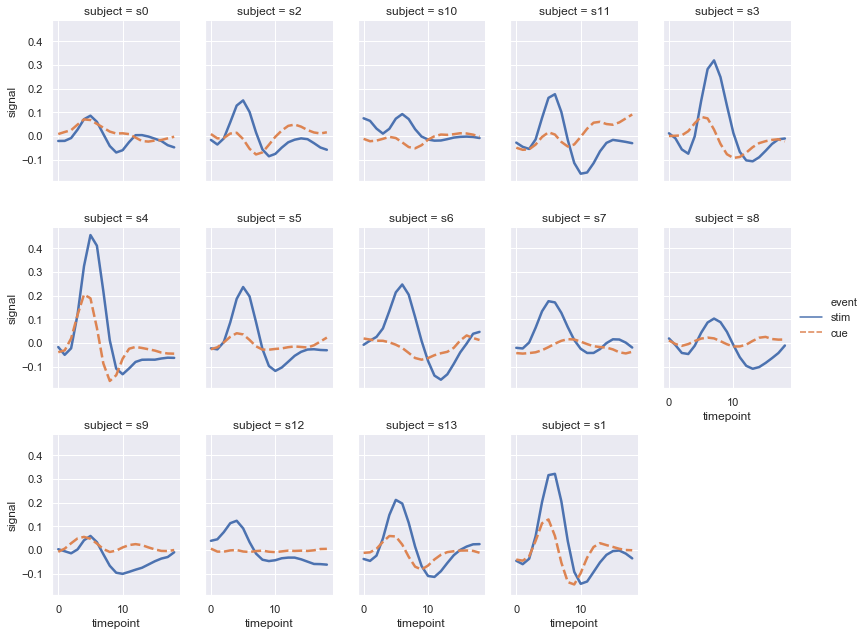

In [101]:
# to examine effects across many levels of variable
sns.relplot(x='timepoint', y='signal', hue='event', style='event',
           col='subject', col_wrap=5,
           height=3, aspect=.75, linewidth=2.5,
           kind='line', data=fmri.query("region=='frontal'"));